In [1]:
import sys
from io import BytesIO
from pathlib import Path
import pandas as pd
import numpy as np

In [2]:
sys.path.append('../src')

from utils import run_cmd

In [62]:
pathList = (
    '/media/NAS/NanoporeOutput/20210429_Spike/Barcode/barcode05',
    '/media/NAS/NanoporeOutput/20210429_Spike/Barcode/barcode06',
    '/media/NAS/NanoporeOutput/20210429_Spike/Barcode/barcode10',
    '/media/NAS/NanoporeOutput/20210429_Spike/Barcode/barcode07',
    '/media/NAS/NanoporeOutput/20210426_clBC_Spike/Barcode/barcode04',    
)

In [79]:
read_status = []
for path in pathList:
    dirpath = Path(path)
    p = run_cmd(f"seqkit fx2tab -j 8 -inlq {dirpath/'*.fastq'}")
    df = pd.read_csv(BytesIO(p.stdout), sep='\t', header=None, names=['read_id', 'length', 'avg_quality'])
    df['barcode'] = dirpath.name
    read_status.append(df)

In [80]:
read_status = pd.concat(read_status, axis=0)

In [81]:
read_status.head()

,read_id,length,avg_quality,barcode
0,b2235d24-720b-4fdc-9d6e-0951479c403e,19969,11.90,barcode05
1,06e8bc30-78ae-483c-977a-90f8abe348c6,220,11.50,barcode05
2,b2087ac2-9f6d-4236-b04a-76bd0b00f93f,4689,12.78,barcode05
3,d4fcf4af-f5d9-4caa-ac1e-b45b1e10f884,455,11.77,barcode05
4,f48aec56-8d1e-4b97-9e79-215ec166c241,9429,13.00,barcode05


In [9]:
filepath = '/media/NAS/NanoporeOutput/20210520_SA_EC_TEST/1_Guppy/sequencing_summary.txt'
sequencing_summary = pd.read_csv(filepath, sep='\t', usecols=['read_id', 'sequence_length_template', 'mean_qscore_template'])

filepath = '/media/NAS/NanoporeOutput/20210520_SA_EC_TEST/barcode/barcoding_summary.txt'
barcoding_summary = pd.read_csv(filepath, sep='\t', usecols=['read_id', 'barcode_arrangement'])

In [28]:
summary = sequencing_summary.merge(barcoding_summary)
summary = summary.rename({'sequence_length_template': 'length',
                          'mean_qscore_template': 'avg_quality',
                          'barcode_arrangement': 'barcode'}, axis=1)
# summary = summary[summary['barcode']!='unclassified']
summary = summary.sort_values('barcode')

In [30]:
drop_data = ['unclassified', 'barcode06', 'barcode12']
summary = summary[~summary['barcode'].isin(drop_data)]

In [19]:
import seaborn as sns
from matplotlib import pyplot as plt

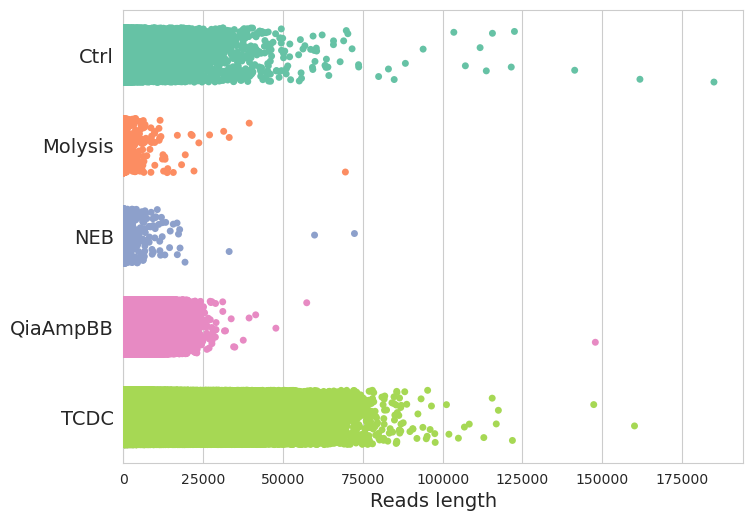

In [35]:
barcode_ls = ['barcode07', 'barcode08', 'barcode09', 'barcode10', 'barcode11']
data = summary[summary['barcode'].isin(barcode_ls)]

with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    g = sns.stripplot(
        x='length',
        y='barcode',
        data=data,
        palette="Set2",
        ax=ax,
        jitter=.3,
        color='#000000',
    )
    ax.set_xlim(0)
    ax.set_yticklabels(['Ctrl', 'Molysis', 'NEB', 'QiaAmpBB', 'TCDC',], fontsize=14)
    ax.set_xlabel('Reads length', fontsize=14)
    ax.set_ylabel('', fontsize=14)
#     plt.axvline(300, ls='--')

In [36]:
fig.savefig('/media/NGS/Nanopore_1/mNGS/20210520_SA_EC/barcode07-11_read_lenght_strip.png',
            dpi=300, bbox_inches='tight', pad_inches=.2)

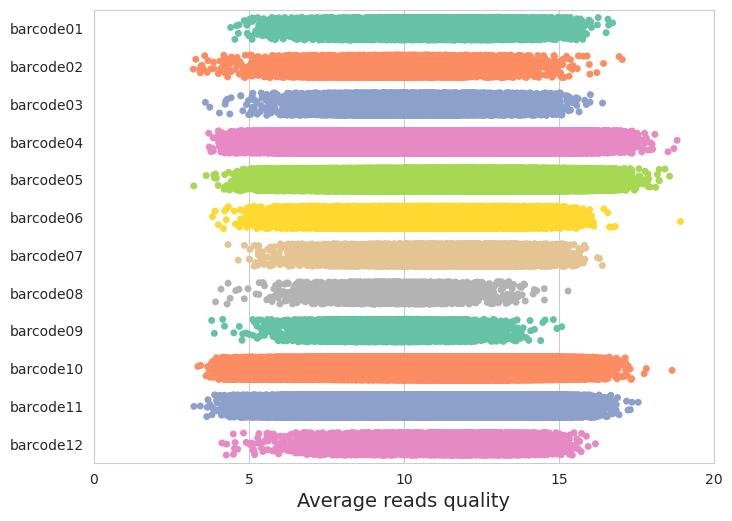

In [27]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    g = sns.stripplot(
        x='avg_quality',
        y='barcode',
        data=summary,
        palette="Set2",
        ax=ax,
        jitter=.3,
#         color='#000000',
    )
    ax.set_xlim(0)
#     ax.set_yticklabels(['Ctrl', 'Molysis', 'NEB', 'QiaAmpBB', 'TCDC',], fontsize=14)
    ax.set_xlabel('Average reads quality', fontsize=14)
    ax.set_ylabel('', fontsize=14)
    ax.set_xticks(range(0, 22, 5))

In [91]:
fig.savefig('/media/NGS/Data_Analysis/20201130_rapid_diagnostic_with_nanopore/DNAPrepare_vs_Quality.png',
            dpi=300, bbox_inches='tight', pad_inches=.2)